In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basedir = '/content/drive/MyDrive/Dissertation/Datasets'

In [6]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'Thornalley et al. (2018), Tsub.csv'))

In [7]:
df = load_csv('/content/drive/MyDrive/Dissertation/Datasets')

In [8]:
df

year  Tsub AMOC proxy [1]   2-sigma  lower bond 95%  upper bond 95%
0      400             2.810626  3.084450        5.895075       -0.273824
1      401             2.808536  3.081712        5.890248       -0.273176
2      402             2.805187  3.078317        5.883504       -0.273130
3      403             2.801904  3.074194        5.876098       -0.272289
4      404             2.798219  3.070384        5.868603       -0.272165
...    ...                  ...       ...             ...             ...
1596  1996            -2.162999  2.752409        0.589410       -4.915409
1597  1997            -2.195913  2.709096        0.513183       -4.905009
1598  1998            -2.223720  2.676530        0.452810       -4.900250
1599  1999            -2.242270  2.666943        0.424673       -4.909213
1600  2000            -2.251693  2.660077        0.408384       -4.911770

[1601 rows x 5 columns]

In [9]:
df.shape

(1601, 5)

In [10]:
df.head()

year  Tsub AMOC proxy [1]   2-sigma  lower bond 95%  upper bond 95%
0   400             2.810626  3.084450        5.895075       -0.273824
1   401             2.808536  3.081712        5.890248       -0.273176
2   402             2.805187  3.078317        5.883504       -0.273130
3   403             2.801904  3.074194        5.876098       -0.272289
4   404             2.798219  3.070384        5.868603       -0.272165

In [11]:
df.tail()

year  Tsub AMOC proxy [1]   2-sigma  lower bond 95%  upper bond 95%
1596  1996            -2.162999  2.752409        0.589410       -4.915409
1597  1997            -2.195913  2.709096        0.513183       -4.905009
1598  1998            -2.223720  2.676530        0.452810       -4.900250
1599  1999            -2.242270  2.666943        0.424673       -4.909213
1600  2000            -2.251693  2.660077        0.408384       -4.911770

In [12]:
pip install plotnine

In [13]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

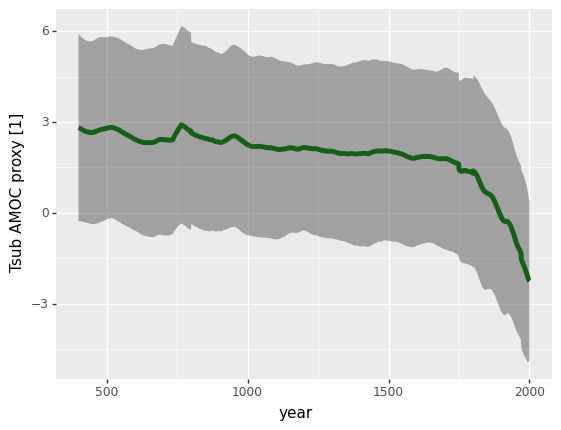

<ggplot: (8738896546957)>

In [15]:
(
    ggplot(df)  
    + aes(x="year", y="Tsub AMOC proxy [1]")  
    + geom_line(colour = 'green', size = 2) 
    + geom_ribbon(aes(ymax = "lower bond 95%",ymin = "upper bond 95%"),alpha = 0.4)
)

In [16]:
new = df.dropna()

In [17]:
o = len(df.axes[0])
n = len(new.axes[0])
print(f"Deleted Rows= {o-n}")

Deleted Rows= 0


In [18]:
column = []
for col in new.columns:
    column.append(col)

In [19]:
for i in column:
  mean = np.mean(df[i])
  print(f"Mean of {i} = {mean}")

Mean of year = 1200.0
Mean of Tsub AMOC proxy [1] = 1.9133076836770757
Mean of 2-sigma = 2.9984935293703963
Mean of lower bond 95% = 4.911801213041222
Mean of upper bond 95% = -1.0851858456976882


In [20]:
for i in column:
  median = np.median(df[i])
  print(f"Median of {i} = {median}")

Median of year = 1200.0
Median of Tsub AMOC proxy [1] = 2.114084248
Median of 2-sigma = 3.003916784
Median of lower bond 95% = 5.02087972
Median of upper bond 95% = -0.813779473


In [21]:
from scipy import stats
for i in column:
  mode = stats.mode(df[i])
  print(f"Mode of {i} = {mode[0][0]}")

Mode of year = 400
Mode of Tsub AMOC proxy [1] = -2.251692554
Mode of 2-sigma = 2.660076964
Mode of lower bond 95% = 0.40838441
Mode of upper bond 95% = -4.935155676


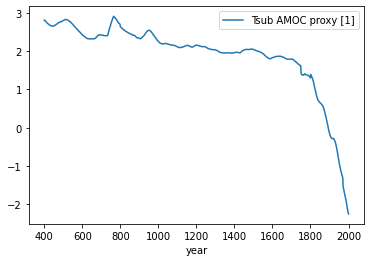

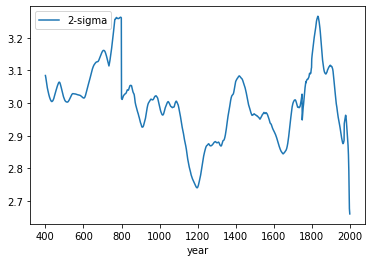

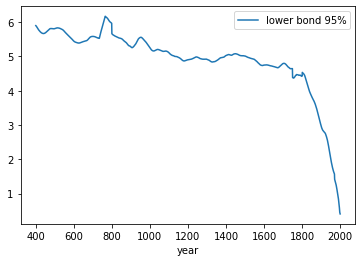

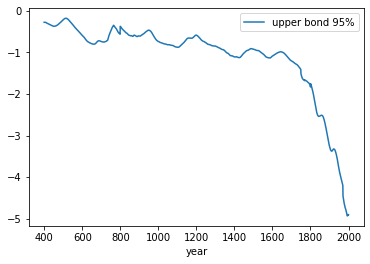

In [22]:
d = 0
for i in column:
  if i != 'year':
    fig = df.plot(x="year", y=[i])
    d = d + 1

In [23]:
!sudo apt-get install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,562 kB of archives.
After this operation, 3,522 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ jags 4.3.0-3bionic0 [1,562 kB]
Fetched 1,562 kB in 0s (6,715 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 155222 files and directories curr

In [24]:
import pyjags

In [25]:
pyjags

<module 'pyjags' from '/usr/local/lib/python3.7/dist-packages/pyjags/__init__.py'>

In [26]:
plt.style.use('ggplot')

In [27]:
N = len('year')
alpha = len('AMOC proxy [K]')
beta = len('lower bound 95%')
sigma = len('upper bound 95%')

In [28]:
# Generate x uniformly
x = np.random.uniform(0, 100, size=N)
# Generate y as alpha + beta * x + Gaussian error term
y = np.random.normal(alpha + x*beta, sigma, size=N)

In [29]:
# JAGS model code
code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dnorm(0.0, 1.0E-4)
    beta ~ dnorm(0.0, 1.0E-4)
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(1.0E-3, 1.0E-3)
}
'''

In [30]:
# Load additional JAGS module
pyjags.load_module('glm')

In [31]:
# Initialize model with 4 chains and run 1000 adaptation steps in each chain.
# We treat alpha, beta and sigma as parameters we would like to infer, based
# on observed values of x and y.
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4, adapt=1000)
 
# 500 warmup / burn-in iterations, not used for inference.
model.sample(500, vars=[])
 
# Run model for 1000 steps, monitoring alpha, beta and sigma variables.
# Returns a dictionary with numpy array for each monitored variable.
# Shapes of returned arrays are (... shape of variable ..., iterations, chains).
# In our example it would be simply (1, 1000, 4).
samples = model.sample(1000, vars=['alpha', 'beta', 'sigma'])

sampling: iterations 2000 of 2000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


In [32]:
# Use pandas three dimensional Panel to represent the trace:
#x = pd.DataFrame({k: v.squeeze(0) for k, v in samples.items()})
trace = pd.Panel({k: v.squeeze(0) for k, v in samples.items()})
#trace.axes[0].name = 'Variable'
##trace.axes[1].name = 'Iteration'
#trace.axes[2].name = 'Chain'
return trace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [33]:
x = {k: v.squeeze(0) for k, v in samples.items()}

In [34]:
x

{'alpha': array([[ 15.16635257, -15.55722308,   7.69548248,  -8.96549928],
        [ -5.8887403 ,  -7.3358559 ,   0.58316886,  -9.04020267],
        [ -6.1015575 , -20.2845202 , -14.7594782 , -24.33647641],
        ...,
        [-10.36399994, -12.13141508,  -3.97480448, -13.04564329],
        [-10.88656801,  -9.68140791,  -2.40799416, -10.29623873],
        [ -1.84916636, -27.4182367 , -15.48701625,  -3.71411152]]),
 'beta': array([[14.73080963, 15.80657028, 15.40840558, 15.77907323],
        [15.46599879, 16.01848196, 15.77004228, 16.17435527],
        [15.5486643 , 15.86585462, 15.80098585, 16.29445817],
        ...,
        [15.92466198, 15.83632541, 15.6651199 , 15.78581981],
        [15.97282563, 15.92005314, 15.71543437, 15.7007988 ],
        [15.89139346, 16.19637876, 16.17345686, 15.84777586]]),
 'sigma': array([[30.97875412,  7.82899623, 10.03326482, 10.91736655],
        [10.4597761 , 16.24704759, 13.05890487, 13.91253381],
        [ 9.35886296,  9.63954787,  7.76294494, 36.5

In [ ]:
# Point estimates:
print(trace.to_frame().mean())
 
# Possible output:
# Variable
# alpha 71.693096
# beta 19.860774
# sigma 49.790683

In [ ]:
# Bayesian equal-tailed 95% credible intervals:
print(trace.to_frame().quantile([0.05, 0.95]))
 
# Possible output:
# Variable alpha beta sigma
# 0.05 61.98259 19.694937 46.472748
# 0.95 81.27412 20.025410 53.284573

In [ ]:
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, fontsize='xx-large')
 
    # Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
     # Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    # Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    # Save figure
    plt.tight_layout()
    fig.savefig('{}.png'.format(var))
 
# Display diagnostic plots
for var in trace:
    plot(trace, var)
 
# Scatter matrix plot:
scatter_matrix(trace.to_frame(), diagonal='density')
plt.savefig('scatter_matrix.png')